Цель:
На этот раз займемся классической задачкой - сегментация клиентов (в данном случае - банка). Крайне полезная операция, которая позволяет вам лучше познакомиться со своей аудиторией, понять, на какие группы она делится и чем они характеризуются.



## Часть 1. EDA и Preprocessing.

1. Скачайте данные по клиентам немецкого банка: https://www.kaggle.com/uciml/german-credit;
2. Проведите EDA, чтобы познакомиться с признаками;
3. Преобразуйте все признаки в числовые подходящими методами;
4. Приведите все данные к одному масштабу (а заодно поясните, почему это необходимая операция при кластеризации).

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.manifold import TSNE
from sklearn.cluster import AgglomerativeClustering, DBSCAN, KMeans
from sklearn.metrics import silhouette_score


In [3]:
df = pd.read_csv('german_credit_data.csv', )
df

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,0,67,male,2,own,NaN,little,1169,6,radio/TV
1,1,22,female,2,own,little,moderate,5951,48,radio/TV
2,2,49,male,1,own,little,NaN,2096,12,education
3,3,45,male,2,free,little,little,7882,42,furniture/equipment
4,4,53,male,2,free,little,little,4870,24,car
...,...,...,...,...,...,...,...,...,...,...
995,995,31,female,1,own,little,NaN,1736,12,furniture/equipment
996,996,40,male,3,own,little,little,3857,30,car
997,997,38,male,2,own,little,NaN,804,12,radio/TV
998,998,23,male,2,free,little,little,1845,45,radio/TV


In [4]:
df = df.drop(['Unnamed: 0'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   817 non-null    object
 5   Checking account  606 non-null    object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
dtypes: int64(4), object(5)
memory usage: 70.4+ KB


In [5]:
df['Saving accounts'].fillna('missing', inplace=True)
df['Checking account'].fillna('missing', inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   1000 non-null   object
 5   Checking account  1000 non-null   object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
dtypes: int64(4), object(5)
memory usage: 70.4+ KB


/var/folders/yv/y6gd0q0d7k14thdfy7xxxs140000gn/T/ipykernel_3380/409936932.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Saving accounts'].fillna('missing', inplace=True)
/var/folders/yv/y6gd0q0d7k14thdfy7xxxs140000gn/T/ipykernel_3380/409936932.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values alw

In [6]:
df.describe()

,Age,Job,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,35.546000,1.904000,3271.258000,20.903000
std,11.375469,0.653614,2822.736876,12.058814
min,19.000000,0.000000,250.000000,4.000000
25%,27.000000,2.000000,1365.500000,12.000000
50%,33.000000,2.000000,2319.500000,18.000000
75%,42.000000,2.000000,3972.250000,24.000000
max,75.000000,3.000000,18424.000000,72.000000


In [7]:
df.nunique()

Age                  53
Sex                   2
Job                   4
Housing               3
Saving accounts       5
Checking account      4
Credit amount       921
Duration             33
Purpose               8
dtype: int64

array([[<Axes: title={'center': 'Age'}>, <Axes: title={'center': 'Job'}>],
       [<Axes: title={'center': 'Credit amount'}>,
        <Axes: title={'center': 'Duration'}>]], dtype=object)

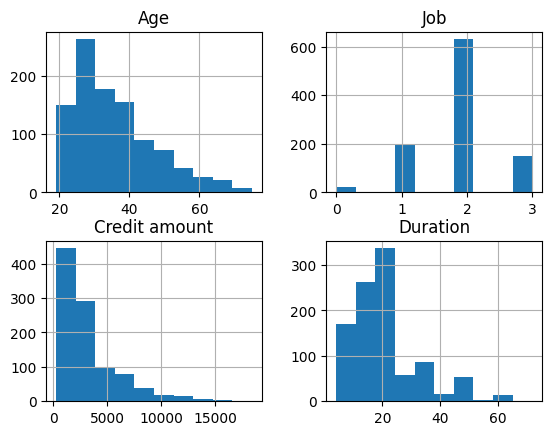

In [8]:
df.hist()

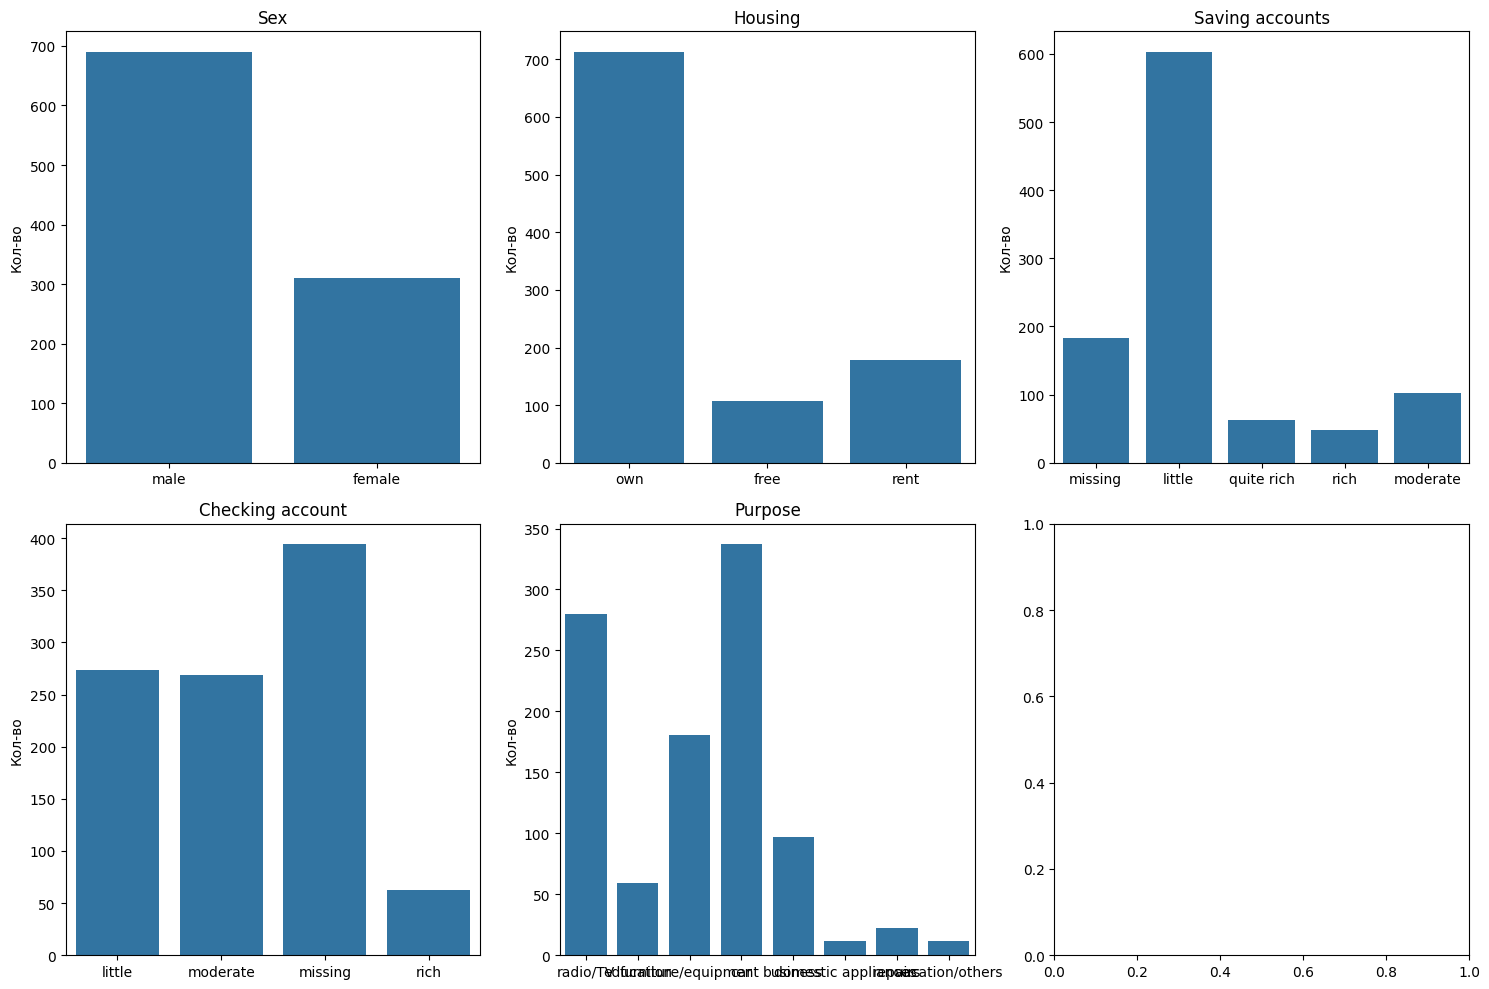

In [9]:
cat_cols = df.select_dtypes(include=['object']).columns
cols = len(cat_cols)
fig, axes = plt.subplots(nrows=(cols+2)//3, ncols=3, figsize=(15, 5*((cols+2)//3)))

for i, col in enumerate(cat_cols):
    ax = axes[i // 3, i % 3]
    sns.countplot(x=col, data=df, ax=ax)
    ax.set_title(col)
    ax.set_xlabel('')
    ax.set_ylabel('Кол-во')

plt.tight_layout()
plt.show()

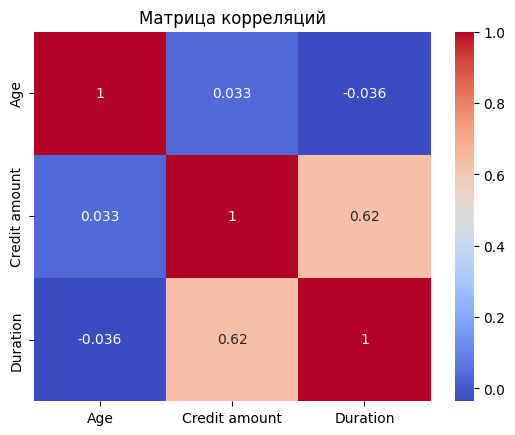

In [10]:
corr = df[['Age', 'Credit amount', 'Duration']].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Матрица корреляций")
plt.show()

In [11]:
cat_columns = df.select_dtypes(include='object').columns.tolist()  # категории
num_columns = df.select_dtypes(exclude='object').columns.tolist() # числовые

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first'), cat_columns)  
    ],
    remainder='passthrough'  
)

X = preprocessor.fit_transform(df)



In [12]:
# Алгоритмы основаны на расстоянии. Масштабируем данные
X = MinMaxScaler().fit_transform(X)

In [13]:
X

array([[1.        , 1.        , 0.        , ..., 0.66666667, 0.05056674,
        0.02941176],
       [0.        , 1.        , 0.        , ..., 0.66666667, 0.31368989,
        0.64705882],
       [1.        , 1.        , 0.        , ..., 0.33333333, 0.10157368,
        0.11764706],
       ...,
       [1.        , 1.        , 0.        , ..., 0.66666667, 0.03048311,
        0.11764706],
       [1.        , 0.        , 0.        , ..., 0.66666667, 0.08776274,
        0.60294118],
       [1.        , 1.        , 0.        , ..., 0.66666667, 0.23803235,
        0.60294118]], shape=(1000, 21))

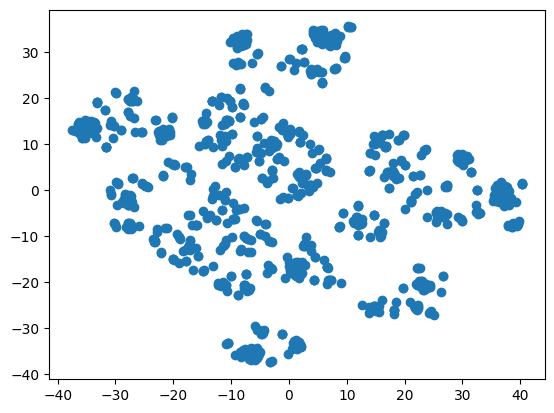

In [14]:
tsne = TSNE(n_components=2, random_state=10)
X_tsne = tsne.fit_transform(X)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1])

Визуально получается 7-10 кластеров

## Часть 2. Моделирование.

1. Постройте три варианта кластеризации: k-means, hierarhical и DBSCAN, подберите оптимальное количество кластеров для каждого метода при помощи Elbow method и Silhouette plot;
2. Также воспользуйтесь различными вариантами сжатия признакового пространства (PCA, UMAP, tSNE) и визуализируйте результаты кластеризации на двумерной плоскости.

### KMeans


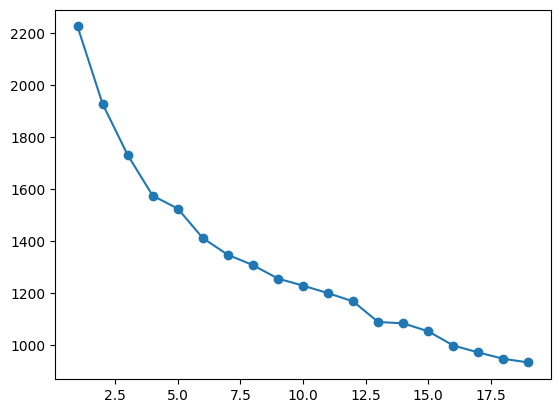

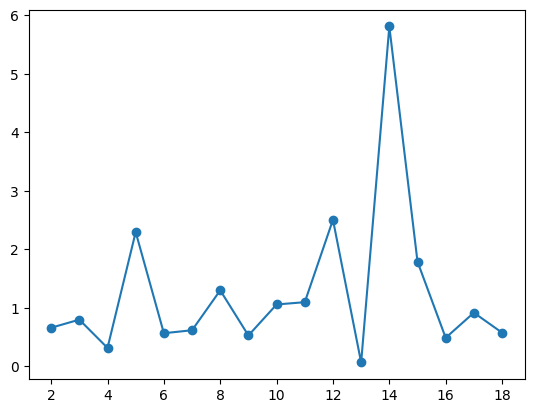

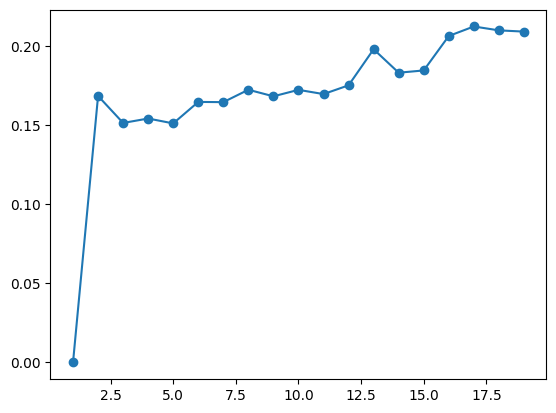

In [15]:
inertia = []
silhouette = []
for i in range(1,20):
    kmeans = KMeans(n_clusters=i, random_state=42).fit(X)
    labels = kmeans.labels_
    if i > 1:
        silhouette_i = silhouette_score(X, labels)
        silhouette.append(silhouette_i)
    else:
        silhouette.append(0)
    inertia_i = kmeans.inertia_
    inertia.append(inertia_i)
    
plt.plot(range(1,20), inertia, marker='o')
plt.show()

## Переломный момент
D = []
for i in range(1,18):
    Di = (inertia[i] - inertia[i+1])/(inertia[i-1] - inertia[i])
    D.append(Di)
    
plt.plot(range(2,19), D, marker='o')
plt.show()

plt.plot(range(1,20), silhouette, marker='o')


Получается KMeans давет лучшие результаты при 7, 9 и 13 кластерах.



<Axes: >

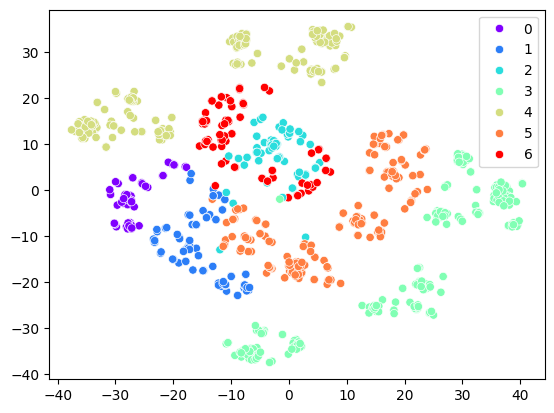

In [16]:
kmeans = KMeans(n_clusters=7, random_state=42).fit(X)
labels_kmeans = kmeans.labels_
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=labels_kmeans, palette='rainbow')

<Axes: >

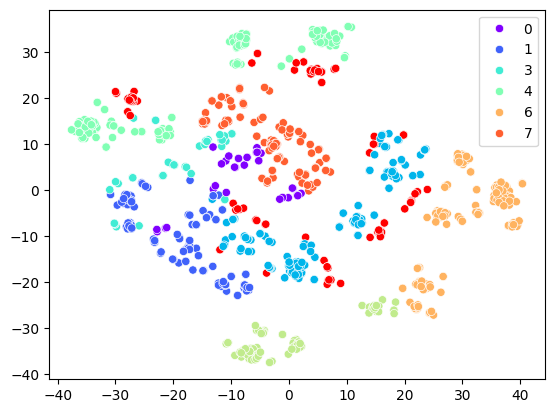

In [17]:
kmeans = KMeans(n_clusters=9, random_state=42).fit(X)
labels_kmeans = kmeans.labels_
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=labels_kmeans, palette='rainbow')

Визуально 7 выглядит лучше. Остановимся на этом количестве кластеров для Kmeans


## Иерархическая кластеризация

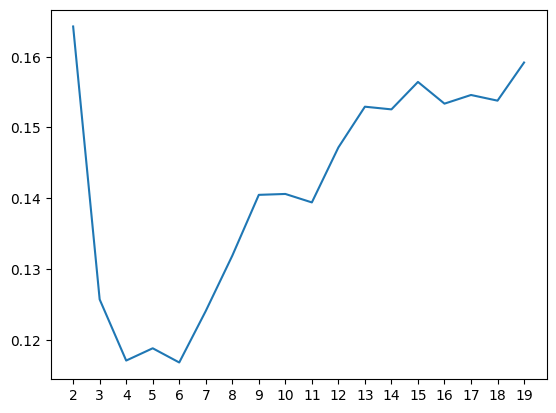

In [21]:
silhouette = []
for i in range(2,20):
    agg = AgglomerativeClustering(n_clusters=i).fit(X)
    labels = agg.labels_
    score = silhouette_score(X, labels)
    silhouette.append(score)

plt.plot(range(2,20), silhouette)
plt.xticks(range(2, 20))
plt.show()


Тут разумным выглядит 9 кластеров

<Axes: >

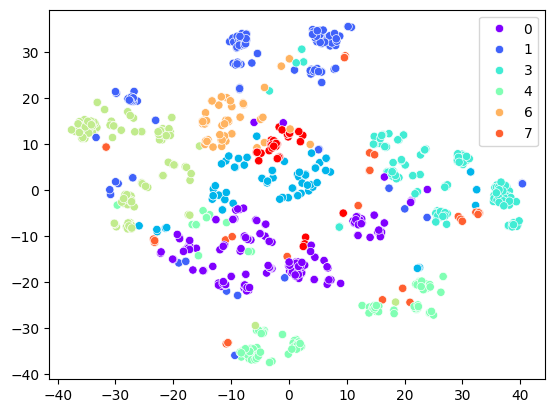

In [72]:
agg = AgglomerativeClustering(n_clusters=9).fit(X)
labels = agg.labels_
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=labels, palette='rainbow')

## DBSCAN

In [53]:
silhouette = []
clusters = []
eps_range = np.arange(.01,2.0,0.01)
for i in eps_range:
    dbscan = DBSCAN(eps=i).fit(X)
    labels = dbscan.labels_
    uniq_labels = np.unique(labels)
    n_clusters = len(uniq_labels[uniq_labels != -1])
    if n_clusters > 1:
        score = silhouette_score(X, labels)
    else:
        score = 0
    silhouette.append(score)
    clusters.append(n_clusters)
    


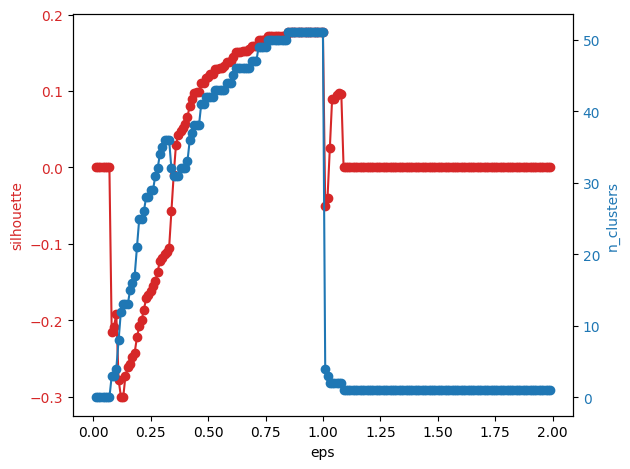

In [54]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.plot(eps_range, silhouette, marker='o', color=color)
ax1.set_xlabel('eps')
ax1.set_ylabel('silhouette', color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  

color = 'tab:blue'
ax2.plot(eps_range, clusters, marker='o', color=color)
ax2.set_ylabel('n_clusters', color=color)  
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  
plt.show()

Возможно я не до конца разобрался, но видимо DBSCAN не лучший алгоритм для этой задачи


# Часть 3. Интерпретация.

1. Теперь ваша задача - попытаться проинтерпретировать получившиеся кластеры, начните с простого расчета средних значений признаков для каждого из кластеров, есть ли интересные закономерности?
2. Теперь постройте boxplot-ы для каждого признака, сгруппировав значения по кластерам, по каким признакам заметно наибольшее отличие кластеров друг от друга? Можно ли их интерпретировать?

Будем интрепритировать результат иерархической кластеризации на 6 признаков

In [73]:
df['labels'] = agg.labels_

In [77]:
df['labels'].value_counts(normalize=True).sort_index()

labels
0    0.184
1    0.145
2    0.090
3    0.153
4    0.126
5    0.136
6    0.070
7    0.047
8    0.049
Name: proportion, dtype: float64

In [87]:
categorical_features = df.select_dtypes(include=['object']).columns.tolist() + ['Job']


In [92]:
df1 = df.drop(['Age', 'Credit amount', 'Duration'], axis=1).groupby('labels').agg(lambda x: x.mode()[0])
df2 = df[['Age', 'Credit amount', 'Duration', 'labels']].groupby('labels').mean()
pd.concat([df1, df2], axis=1)

,Sex,Job,Housing,Saving accounts,Checking account,Purpose,Age,Credit amount,Duration
labels,,,,,,,,,
0,male,2,own,little,little,furniture/equipment,34.092391,3413.293478,21.304348
1,male,2,own,little,missing,car,38.400000,3727.234483,21.434483
2,male,2,rent,little,moderate,radio/TV,33.944444,3358.166667,23.855556
3,male,2,own,little,missing,radio/TV,37.287582,2754.359477,20.222222
4,male,2,own,little,moderate,radio/TV,34.333333,2481.730159,19.769841
5,male,2,own,little,little,car,39.441176,4077.632353,21.897059
6,female,2,rent,little,missing,car,31.485714,3399.500000,18.457143
7,male,2,own,moderate,missing,radio/TV,34.127660,2866.021277,21.787234
8,female,2,rent,little,little,furniture/equipment,29.530612,2840.551020,17.326531


Категории

- 0 - Мужчины, как правило владельцы жилья, имеющие небольшой текущий счет, взявшие кредит на мебель/оборудование
- 1 - Мужчины, как правило владельцы жилья,  взявшие кредит на автомобиль. Возраст ближе к 40
- 2 - Мужчины, как правило арендаторы жилья, имеющие умеренный текущий счет, взявшие кредит на TV более в размере более 3000
- 3 - Мужчины, как правило владельцы жилья, взявшие кредит на TV. По ним не известен размер счета, но их возраст больше, чем в 2 и размер кредита меньше, чем в 2
- 4 - Мужчины, как правило владельцы жилья,  имеющие умеренный текущий счет, взявшие кредит на TV. Размер кредита меньше 2500
- 5 - Мужчины, как правило владельцы жилья,  имеющие маленький текущий счет, взявшие кредит на авто. Возраст близок к 40 и кредит близок к 4000
- 6 - Женщины, как правило снимающие жилье,  взявшие кредит на авто. 
- 7 - Мужчины, как правило владельцы жилья,  имеющие сберегательный счет, взявшие кредит на ТВ. 
- 8 - Женщины, как правило снимающие жилье,  взявшие кредит на мебель/оборудование
